In [1]:
%load_ext autoreload
%autoreload 2   

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import json

from qscope.fitting.image_fitting import scipyfit


In [3]:
# load test data
esr_data = np.load('003_esr.npy')
data_dict = json.load(open('003_esr.json', 'r'))
f_list = data_dict['freq_list']

meta_dict = json.load(open('003_esr_metadata.json', 'r'))


In [4]:
# Make the fit function model
fit_functions = {"linear": 1, "lorentzian": 1},
fit_model = scipyfit.define_fit_model()

In [5]:
# define the rebinned and smoothed data set for fitting
smoothing = 4
binning = 4
image_rebinned, sig, ref, sig_norm = scipyfit.prepare_data(esr_data, smoothing, binning)

In [7]:
# c m width pos amp
p0 = [1, 0, 15, 2465, -0.005]
bounds = ([0.9, -5, 5, 2430, -0.1], 
          [1.1, 5, 60, 2490, -0.0005])
fit_optn = {"bounds":bounds}
res, sigmas = scipyfit.fit_all_pixels_pl_scipyfit(sig_norm, 
                                    f_list,
                                    fit_model,
                                    p0,
                                    fit_optn)

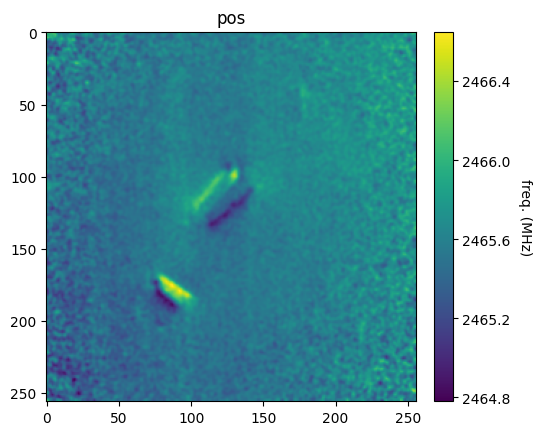

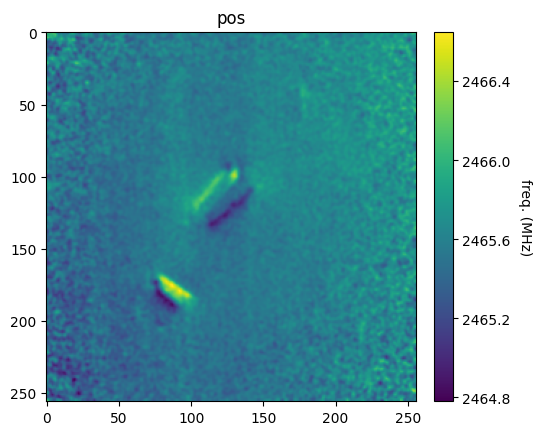

In [11]:
scipyfit.pl_param_image(res['pos_0'], 
                        'pos', 
                        'freq. (MHz)', 
                        save_plot=True, 
                        dir_path='003_esr_bin_' + str(binning))



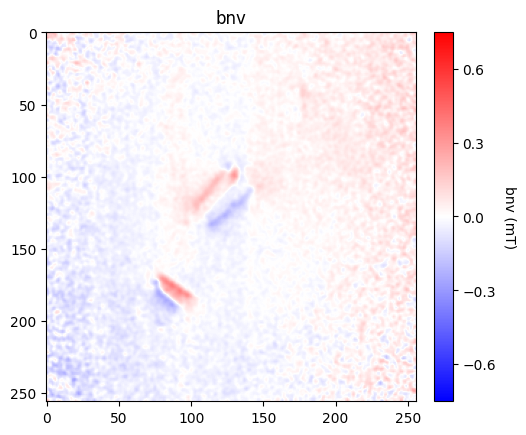

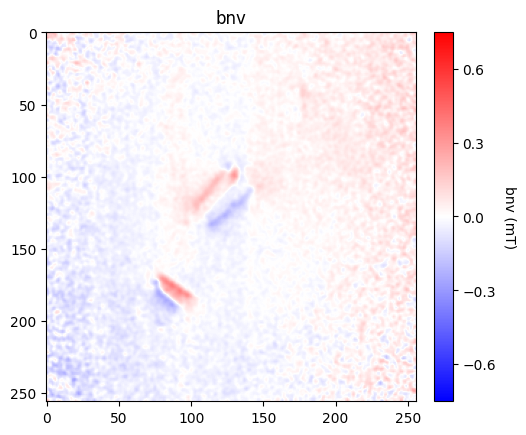

In [29]:
scipyfit.pl_param_image((res['pos_0'] - np.mean(res['pos_0'] ))/2.87, 
                        'bnv', 
                        'bnv (mT)', 
                        save_plot=True,
                        c_map='bwr', 
                        c_range = [-0.75, 0.75],
                        dir_path='003_esr_bin_' + str(binning))

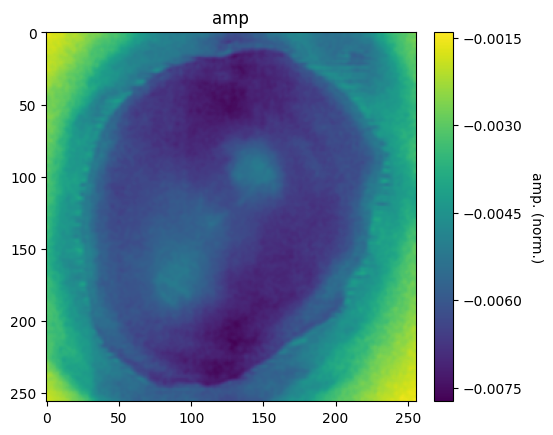

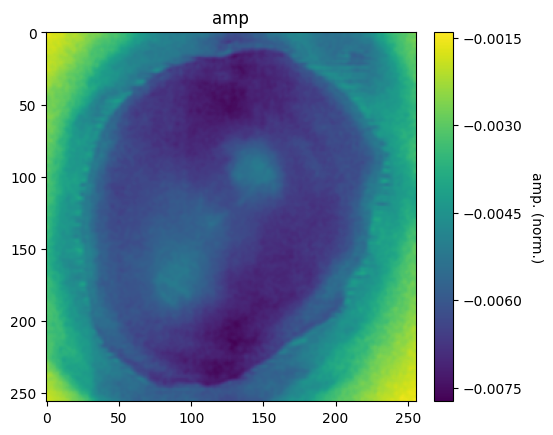

In [10]:
scipyfit.pl_param_image(res['amp_0'], 
                        'amp', 
                        'amp. (norm.)', 
                        save_plot=True, 
                        dir_path='003_esr_bin_' + str(binning))

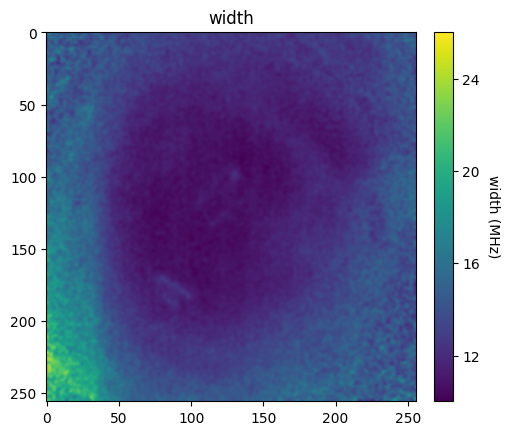

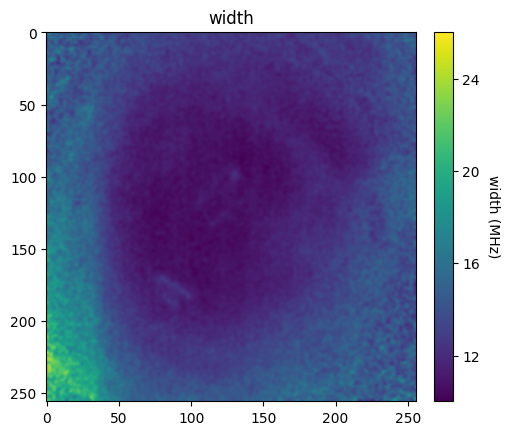

In [14]:
scipyfit.pl_param_image(res['fwhm_0'], 
                        'width', 
                        'width (MHz)', 
                        save_plot=True, 
                        dir_path='003_esr_bin_' + str(binning))

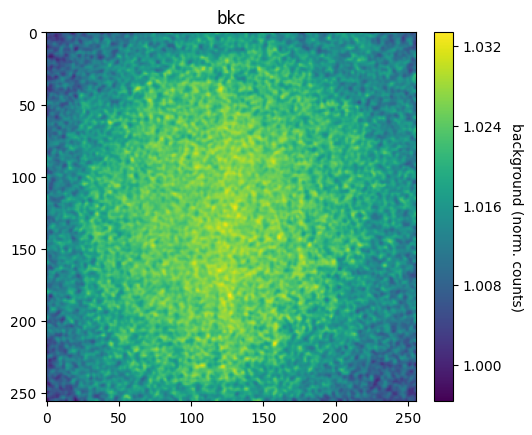

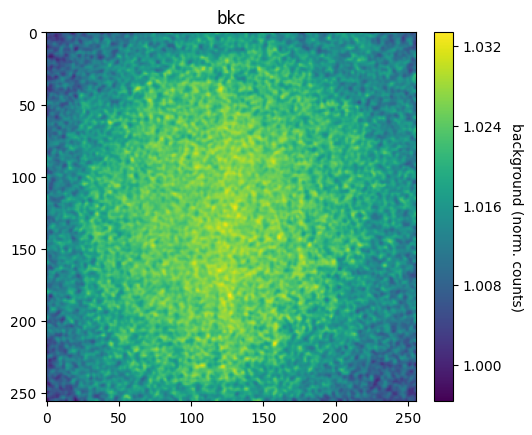

In [17]:
scipyfit.pl_param_image(res['c_0'], 
                        'bkc', 
                        'background (norm. counts)', 
                        save_plot=True, 
                        dir_path='003_esr_bin_' + str(binning))

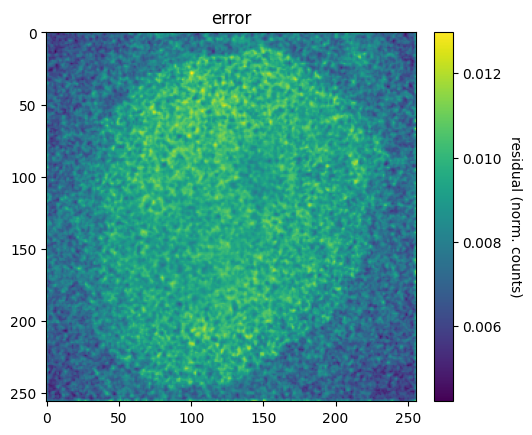

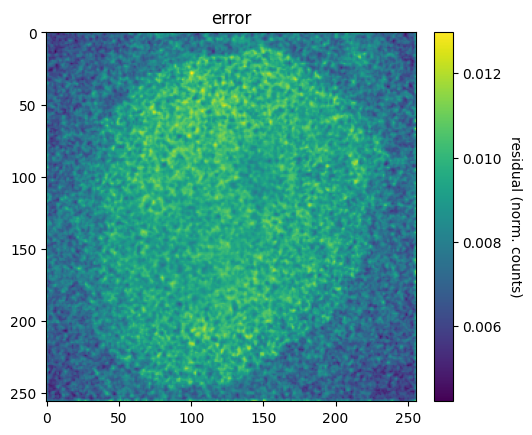

In [16]:
scipyfit.pl_param_image(res['residual_0'], 
                        'error', 
                        'residual (norm. counts)', 
                        save_plot=True, 
                        dir_path='003_esr_bin_' + str(binning))